<a href="https://colab.research.google.com/github/Y-B-Class-Projects/CNN-CIFAR-10-Dataset/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Written by: Baruch Baksht: 211302088, Israel Rolnik: 206672057
### Lecturer: professor Avi Rosenfeld

## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

Much of this code is from Intel's course at: https://software.intel.com/content/dam/develop/public/us/en/downloads/intel-dl101-class6.zip, but I added some tweaks of my own ;)

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


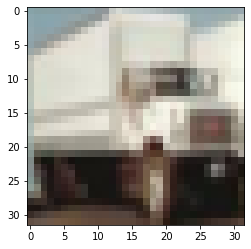

In [ ]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10
print(y_train[444])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

[9]


In [ ]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2))) 
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

### Exercise
There are many things we can change in CNNs:
1. The batch size
2. The parameters within a specific CNN layer such as if padding is used, the size (kernel size) and number of filters used, and stride size
3. The Dropout rate (if any) that is used
4. The CNN architecture including the number of layers and if and when to use MaxPool (AvgPool usually isn't used today).
5. The optimizer used (and the learning rate in the optimizer)
6. In theory which activation function, but in CNN's Relu is almost always used except for the last layer which is Softmax (which activation function is Softmax???)

Questions: 

A. Build model_2 which checks the performance of batch sizes of 4, 128 and 1024.  Which one works best after 10 epochs?  Which one runs the fastest?

B. Build model_3 which adds padding to all layers. Does that improve performance?

C. Build model_4 which uses the same architecture from the MNIST network. Does that work better?

D. Build model_5 which adds to the structure of model_1-- either by adding more convolution layers or Maxpool layers.   Intel suggests trying the architecture: 

Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

instead of:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

If you do this, you will likely need to lower the stride to 1 as otherwise the layers are not big enough in this dataset!

Please run the network that worked the best for more than 10 epochs and see how good you get!

Hint:  Feel free to work on different colab notebooks in parallel (Google doesn't care until around 5 at the same time) and / or run the code on your computer and then paste it back to Colab when you are done (the code works faster on my computer than in Colab but everyone's computer is different).

Your grade is based on the following:

80 points for correctly doing all questions and documenting your solution including the answers to the my questions.

5 points for breaking 65% accuracy in your best model

10 points for breaking 70% accuracy in your best model

3 points for breaking 72% accuracy in your best model

2 points for breaking 75% accuracy in your best model


---
# Solution

### model_2 
(which checks the performance of batch sizes of 4, 128 and 1024)


In [ ]:
model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (2,2))) 
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_5 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

### batch_size = 4

In [ ]:
batch_size = 4
num_epochs = 10

# initiate Adam optimizer like in the first example
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
12500/12500 [==============================] - 67s 3ms/step - loss: 1.8817 - accuracy: 0.3042 - val_loss: 1.4600 - val_accuracy: 0.4536
Epoch 2/10
12500/12500 [==============================] - 34s 3ms/step - loss: 1.5452 - accuracy: 0.4381 - val_loss: 1.4813 - val_accuracy: 0.4682
Epoch 3/10
12500/12500 [==============================] - 33s 3ms/step - loss: 1.4953 - accuracy: 0.4608 - val_loss: 1.3457 - val_accuracy: 0.5229
Epoch 4/10
12500/12500 [==============================] - 33s 3ms/step - loss: 1.4668 - accuracy: 0.4743 - val_loss: 1.3641 - val_accuracy: 0.5145
Epoch 5/10
12500/12500 [==============================] - 34s 3ms/step - loss: 1.4476 - accuracy: 0.4838 - val_loss: 1.3702 - val_accuracy: 0.5132
Epoch 6/10
12500/12500 [==============================] - 34s 3ms/step - loss: 1.4432 - accuracy: 0.4877 - val_loss: 1.3022 - val_accuracy: 0.5267
Epoch 7/10
12500/12500 [==============================] - 33s 3ms/step - loss: 1.4487 - accuracy: 0.4842 - val_loss: 1

### batch_size = 128

In [ ]:
batch_size = 128
num_epochs = 10

# initiate Adam optimizer like in the first example
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
391/391 [==============================] - 3s 7ms/step - loss: 1.3063 - accuracy: 0.5374 - val_loss: 1.2061 - val_accuracy: 0.5806
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.2351 - accuracy: 0.5643 - val_loss: 1.1767 - val_accuracy: 0.5877
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.2063 - accuracy: 0.5748 - val_loss: 1.1837 - val_accuracy: 0.5888
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1908 - accuracy: 0.5768 - val_loss: 1.1497 - val_accuracy: 0.5962
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1791 - accuracy: 0.5814 - val_loss: 1.1508 - val_accuracy: 0.5962
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1664 - accuracy: 0.5827 - val_loss: 1.1404 - val_accuracy: 0.6050
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1575 - accuracy: 0.5883 - val_loss: 1.1385 - val_accuracy: 0.6005
Epoch 

### batch_size = 1024

In [ ]:
batch_size = 1024
num_epochs = 10

# initiate Adam optimizer like in the first example
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
49/49 [==============================] - 2s 28ms/step - loss: 1.0643 - accuracy: 0.6209 - val_loss: 1.0774 - val_accuracy: 0.6251
Epoch 2/10
49/49 [==============================] - 1s 22ms/step - loss: 1.0570 - accuracy: 0.6194 - val_loss: 1.0764 - val_accuracy: 0.6254
Epoch 3/10
49/49 [==============================] - 1s 22ms/step - loss: 1.0451 - accuracy: 0.6266 - val_loss: 1.0743 - val_accuracy: 0.6272
Epoch 4/10
49/49 [==============================] - 1s 22ms/step - loss: 1.0516 - accuracy: 0.6232 - val_loss: 1.0731 - val_accuracy: 0.6275
Epoch 5/10
49/49 [==============================] - 1s 22ms/step - loss: 1.0451 - accuracy: 0.6277 - val_loss: 1.0736 - val_accuracy: 0.6280
Epoch 6/10
49/49 [==============================] - 1s 23ms/step - loss: 1.0497 - accuracy: 0.6241 - val_loss: 1.0767 - val_accuracy: 0.6273
Epoch 7/10
49/49 [==============================] - 1s 23ms/step - loss: 1.0402 - accuracy: 0.6277 - val_loss: 1.0706 - val_accuracy: 0.6289
Epoch 8/10
49

### In conclusion:


batch_size = 4 -> accuracy = **52.18%**

batch_size = 128 -> accuracy = **60.82%**

batch_size = 1024 -> accuracy = **63.21%**


(increasing the batch_size increases the accuracy)

**Q:** Which one works best after 10 epochs? Which one runs the fastest?

**A:** 1024 batch_size works best and fastest.

Based on these results we will work from now on with 1024 batch_size

In [ ]:
batch_size = 1024
num_epochs = 10

### model_3
(which adds padding to all layers)

In [ ]:
model_3 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_3.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_3.add(Conv2D(32, (5, 5), strides = (2,2), padding='same')) 
model_3.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_5 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [ ]:
# initiate Adam optimizer like in the first example
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
49/49 [==============================] - 2s 32ms/step - loss: 1.1181 - accuracy: 0.6098 - val_loss: 0.9472 - val_accuracy: 0.6690
Epoch 2/10
49/49 [==============================] - 1s 26ms/step - loss: 0.9682 - accuracy: 0.6576 - val_loss: 0.9329 - val_accuracy: 0.6743
Epoch 3/10
49/49 [==============================] - 1s 26ms/step - loss: 0.9555 - accuracy: 0.6627 - val_loss: 0.9301 - val_accuracy: 0.6776
Epoch 4/10
49/49 [==============================] - 1s 26ms/step - loss: 0.9445 - accuracy: 0.6691 - val_loss: 0.9274 - val_accuracy: 0.6760
Epoch 5/10
49/49 [==============================] - 1s 26ms/step - loss: 0.9336 - accuracy: 0.6708 - val_loss: 0.9123 - val_accuracy: 0.6799
Epoch 6/10
49/49 [==============================] - 1s 26ms/step - loss: 0.9207 - accuracy: 0.6754 - val_loss: 0.9142 - val_accuracy: 0.6828
Epoch 7/10
49/49 [==============================] - 1s 27ms/step - loss: 0.9172 - accuracy: 0.6787 - val_loss: 0.8965 - val_accuracy: 0.6892
Epoch 8/10
49

 **Q:** Does that improve performance? 

 **A:** Yes! Increase the accuracy by 5.45% to **68.66%**

###model_4
(which uses the same architecture from the MNIST network)

In [ ]:
model_4 = keras.Sequential(
    [
        keras.Input(shape=x_train.shape[1:]),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 2304)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [ ]:
# initiate Adam optimizer like in the first example
model_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_4.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
49/49 [==============================] - 2s 34ms/step - loss: 2.1571 - accuracy: 0.1982 - val_loss: 1.7121 - val_accuracy: 0.3906
Epoch 2/10
49/49 [==============================] - 1s 29ms/step - loss: 1.6785 - accuracy: 0.3996 - val_loss: 1.5128 - val_accuracy: 0.4697
Epoch 3/10
49/49 [==============================] - 1s 30ms/step - loss: 1.5186 - accuracy: 0.4569 - val_loss: 1.4199 - val_accuracy: 0.4945
Epoch 4/10
49/49 [==============================] - 1s 29ms/step - loss: 1.4305 - accuracy: 0.4913 - val_loss: 1.3515 - val_accuracy: 0.5281
Epoch 5/10
49/49 [==============================] - 1s 29ms/step - loss: 1.3794 - accuracy: 0.5104 - val_loss: 1.3136 - val_accuracy: 0.5416
Epoch 6/10
49/49 [==============================] - 1s 30ms/step - loss: 1.3291 - accuracy: 0.5355 - val_loss: 1.2777 - val_accuracy: 0.5581
Epoch 7/10
49/49 [==============================] - 1s 29ms/step - loss: 1.2988 - accuracy: 0.5446 - val_loss: 1.2352 - val_accuracy: 0.5728
Epoch 8/10
49

**Q:** Does that work better?

**A:** No! the accuracy is lower - **60.02%**.

###model_5 

(Intel suggestion:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification , with **100 epochs**)

In [ ]:
# Let's build a CNN using Keras' Sequential capabilities

model_5 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_5.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_5.add(Conv2D(32, (5, 5), padding='same')) 
model_5.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

## 5x5 convolution with 2x2 stride and 32 filters
model_5.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_5.add(Conv2D(32, (5, 5), padding='same')) 
model_5.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_5.add(Flatten())
model_5.add(Dense(512))
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))

model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 32)      

In [ ]:
# initiate Adam optimizer like in the first example
model_5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_5.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
49/49 [==============================] - 6s 102ms/step - loss: 0.8356 - accuracy: 0.7664 - val_loss: 0.6957 - val_accuracy: 0.7761
Epoch 2/100
49/49 [==============================] - 5s 98ms/step - loss: 0.3238 - accuracy: 0.8852 - val_loss: 0.6902 - val_accuracy: 0.7906
Epoch 3/100
49/49 [==============================] - 5s 99ms/step - loss: 0.2645 - accuracy: 0.9068 - val_loss: 0.7073 - val_accuracy: 0.7898
Epoch 4/100
49/49 [==============================] - 5s 100ms/step - loss: 0.2551 - accuracy: 0.9075 - val_loss: 0.6969 - val_accuracy: 0.7897
Epoch 5/100
49/49 [==============================] - 5s 100ms/step - loss: 0.2483 - accuracy: 0.9076 - val_loss: 0.7171 - val_accuracy: 0.7882
Epoch 6/100
49/49 [==============================] - 5s 101ms/step - loss: 0.2560 - accuracy: 0.9080 - val_loss: 0.7155 - val_accuracy: 0.7904
Epoch 7/100
49/49 [==============================] - 5s 100ms/step - loss: 0.2400 - accuracy: 0.9141 - val_loss: 0.7182 - val_accuracy: 0.7875
E

Intel model (with 100 epochs) results: **78.71%** accuracy! **(>75%)**

### model_6
We wanted to try to pass the 80% accuracy and built the following model that based on [this](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/) article.

In [ ]:
model_6 = Sequential()
model_6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(MaxPooling2D((2, 2)))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(MaxPooling2D((2, 2)))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(MaxPooling2D((2, 2)))
model_6.add(Dropout(0.2))
model_6.add(Flatten())
model_6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_6.add(Dropout(0.2))
model_6.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model_6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model_6.fit(x_train, y_train,
              batch_size=64,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

score = model_6.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
782/782 [==============================] - 8s 9ms/step - loss: 2.2325 - accuracy: 0.1749 - val_loss: 1.6972 - val_accuracy: 0.4033
Epoch 2/100
782/782 [==============================] - 7s 8ms/step - loss: 1.7132 - accuracy: 0.3646 - val_loss: 1.4981 - val_accuracy: 0.4490
Epoch 3/100
782/782 [==============================] - 7s 8ms/step - loss: 1.5402 - accuracy: 0.4364 - val_loss: 1.3584 - val_accuracy: 0.5192
Epoch 4/100
782/782 [==============================] - 7s 8ms/step - loss: 1.4233 - accuracy: 0.4823 - val_loss: 1.2580 - val_accuracy: 0.5502
Epoch 5/100
782/782 [==============================] - 7s 8ms/step - loss: 1.3381 - accuracy: 0.5159 - val_loss: 1.2636 - val_accuracy: 0.5502
Epoch 6/100
782/782 [==============================] - 7s 8ms/step - loss: 1.2725 - accuracy: 0.5396 - val_loss: 1.1303 - val_accuracy: 0.6008
Epoch 7/100
782/782 [==============================] - 7s 8ms/step - loss: 1.2022 - accuracy: 0.5674 - val_loss: 1.1812 - val_accuracy: 0.5791

### We got about **83%** accuracy